In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("C:/users/user/Downloads/car_insurance_claim.csv")

In [7]:
df.shape

(10302, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [9]:
# CLAIM_FLAG --> TARGET VARIABLE

# YOJ(float) , INCOME(object) , HOME_VAL(object) , OCCUPATION(object) , CAR_AGE(float)  : HAVE SOME NULL VALUES 

In [10]:
df['HOME_VAL'].head()

0          $0
1    $257,252
2          $0
3    $124,191
4    $306,251
Name: HOME_VAL, dtype: object

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='Density'>

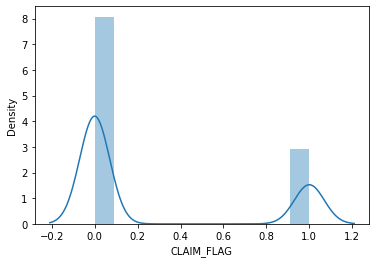

In [11]:
sns.distplot(df['CLAIM_FLAG'])

In [12]:
# From the graph , it can be observed that ,
    # Roughly around 20% data is fraud claims .

In [13]:
df[df['CLAIM_FLAG']==1].shape

(2746, 27)

In [14]:
df.shape

(10302, 27)

In [15]:
2746/10302
# Percentage of fraud claims 

0.2665501844302077

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [17]:
df['KIDSDRIV'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [18]:
df['BIRTH'].unique()

array(['16MAR39', '21JAN56', '18NOV51', ..., '13AUG54', '18JUN51',
       '27FEB47'], dtype=object)

In [19]:
df['CAR_AGE'].nunique()

30

In [20]:
df['BIRTH'].nunique()

6560

In [21]:
df['AGE'].nunique()

61

In [22]:
# Birth is the DOB of the owner of the car
# Age is the age of the owner of the car
# since one is derivable from the other 
# any one of the two is enough for training of the model 

In [23]:
df['HOMEKIDS'].nunique()

6

In [24]:
df['HOMEKIDS'].value_counts()

0    6694
2    1427
1    1106
3     856
4     201
5      18
Name: HOMEKIDS, dtype: int64

In [25]:
df['YOJ'].unique()
# Years on job

array([11., 10., 14., nan, 12.,  7.,  5.,  0., 13.,  9., 17.,  8., 15.,
       16.,  6., 18., 23.,  4.,  3.,  2., 19.,  1.])

In [26]:
df['INCOME'].nunique()

8151

In [27]:
df['INCOME'].head()

0    $67,349
1    $91,449
2    $52,881
3    $16,039
4        NaN
Name: INCOME, dtype: object

In [28]:
# Income field is of object dtype
# Its actually number but just to add a dollar symbol in front , it was converted to object datatype 

In [29]:
df['PARENT1'].nunique()

2

In [30]:
df['PARENT1'].value_counts()

No     8959
Yes    1343
Name: PARENT1, dtype: int64

In [31]:
#Single parent or not

In [32]:
df['HOME_VAL'].nunique()

6334

In [33]:
# It is also in dollars hence of object dtype , similar to income

In [34]:
df['MSTATUS'].unique()

array(['z_No', 'Yes'], dtype=object)

In [35]:
df['MSTATUS'].value_counts()

Yes     6188
z_No    4114
Name: MSTATUS, dtype: int64

In [36]:
# MSTATUS : Marital status

In [37]:
df['GENDER'].value_counts()

z_F    5545
M      4757
Name: GENDER, dtype: int64

In [38]:
df['EDUCATION'].value_counts()

z_High School    2952
Bachelors        2823
Masters          2078
<High School     1515
PhD               934
Name: EDUCATION, dtype: int64

In [39]:
df['OCCUPATION'].value_counts()

z_Blue Collar    2288
Clerical         1590
Professional     1408
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: OCCUPATION, dtype: int64

In [40]:
df['TRAVTIME'].head()

0    14
1    22
2    26
3     5
4    32
Name: TRAVTIME, dtype: int64

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TRAVTIME', ylabel='Density'>

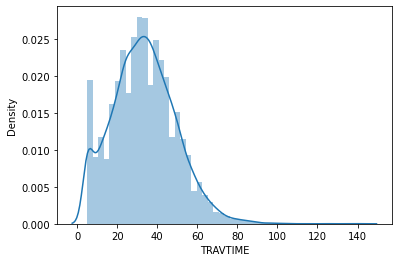

In [41]:
sns.distplot(df['TRAVTIME'])

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRAVTIME'>

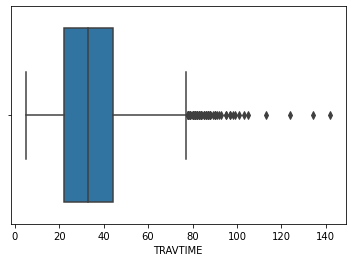

In [42]:
sns.boxplot(df['TRAVTIME'])

In [43]:
# more travel time --> more risk of crashes 

In [44]:
df['CAR_USE'].value_counts()

Private       6513
Commercial    3789
Name: CAR_USE, dtype: int64

In [45]:
# This featuer specifies if the car is used for commercial purpose or private 

In [46]:
df['BLUEBOOK']

0        $14,230
1        $14,940
2        $21,970
3         $4,010
4        $15,440
          ...   
10297    $13,270
10298    $24,490
10299    $13,820
10300    $22,550
10301    $19,400
Name: BLUEBOOK, Length: 10302, dtype: object

In [47]:
# Bluebook : Value of the vehicle

In [48]:
# object dtype --> similar to income

In [49]:
df['TIF'].head()

0    11
1     1
2     1
3     4
4     7
Name: TIF, dtype: int64

In [50]:
# TIF : Time in Force 
# People who have been customers for long itme

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TIF', ylabel='Density'>

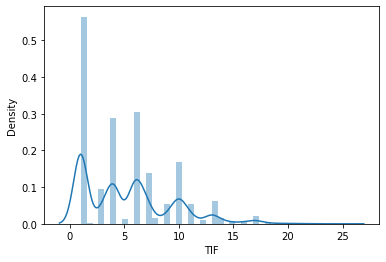

In [51]:
sns.distplot(df['TIF'])
# No pattern 

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TIF'>

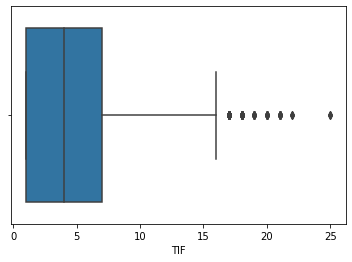

In [52]:
sns.boxplot(df['TIF'])

In [53]:
# customers who are with the company for long time --> less likely to be fraud 

In [54]:
df['CAR_TYPE'].value_counts()

z_SUV          2883
Minivan        2694
Pickup         1772
Sports Car     1179
Van             921
Panel Truck     853
Name: CAR_TYPE, dtype: int64

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CAR_TYPE', ylabel='count'>

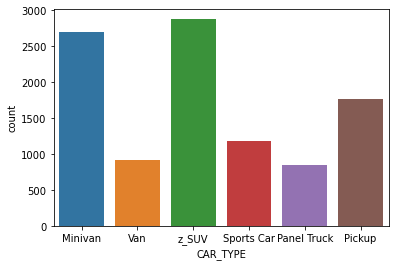

In [55]:
sns.countplot(df['CAR_TYPE'])

In [56]:
df['RED_CAR'].value_counts()

no     7326
yes    2976
Name: RED_CAR, dtype: int64

In [57]:
# this feature gives : if the car is red or not
# generally they say : red cars are sprts cars and are risky 

In [58]:
df['OLDCLAIM'].value_counts()

$0         6292
$1,310        4
$4,263        4
$4,538        4
$4,448        4
           ... 
$4,403        1
$35,070       1
$10,264       1
$4,052        1
$4,402        1
Name: OLDCLAIM, Length: 3545, dtype: int64

In [59]:
# How much insurance money they took in the past 5 years
# dtype : object similar to income

In [60]:
df['CLM_FREQ'].value_counts()

0    6292
2    1492
1    1279
3     992
4     225
5      22
Name: CLM_FREQ, dtype: int64

In [61]:
# no.of times they took the claim

In [62]:
df['REVOKED'].value_counts()

No     9041
Yes    1261
Name: REVOKED, dtype: int64

In [63]:
# In past 7 yrs , was his license revoked 
# if yes --> he is a more risky driver

In [64]:
df['MVR_PTS']

0        3
1        0
2        2
3        3
4        0
        ..
10297    2
10298    0
10299    0
10300    0
10301    0
Name: MVR_PTS, Length: 10302, dtype: int64

In [65]:
# Motor Vehicle Record Points

In [66]:
# If u get lots of traffic tickets
    # a ticket issued for driving above the speed limit.

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MVR_PTS', ylabel='Density'>

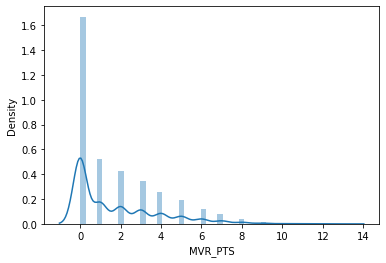

In [67]:
sns.distplot(df['MVR_PTS'])

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MVR_PTS', ylabel='count'>

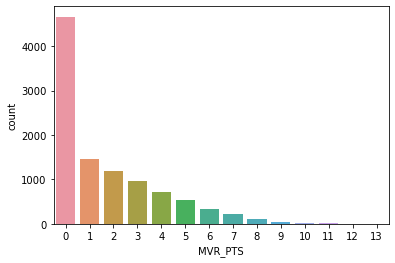

In [68]:
sns.countplot(df['MVR_PTS'])

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MVR_PTS'>

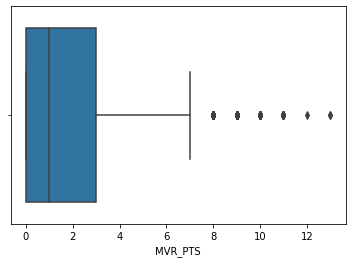

In [69]:
sns.boxplot(df['MVR_PTS'])

In [70]:
df['CLM_AMT'].value_counts()

$0         7556
$3,667        4
$4,363        4
$2,327        4
$3,350        4
           ... 
$19,247       1
$2,058        1
$5,627        1
$5,032        1
$4,402        1
Name: CLM_AMT, Length: 2346, dtype: int64

In [71]:
df['CLM_AMT'].nunique()

2346

In [72]:
# How much amount they havve claimed until now
# dtype : object similar to income

In [73]:
df['CAR_AGE']

0        18.0
1         1.0
2        10.0
3        10.0
4         6.0
         ... 
10297    17.0
10298     1.0
10299     1.0
10300    11.0
10301     9.0
Name: CAR_AGE, Length: 10302, dtype: float64

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CAR_AGE', ylabel='Density'>

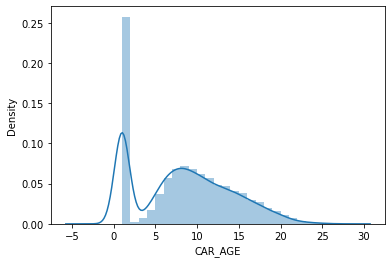

In [74]:
sns.distplot(df['CAR_AGE'])

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CAR_AGE'>

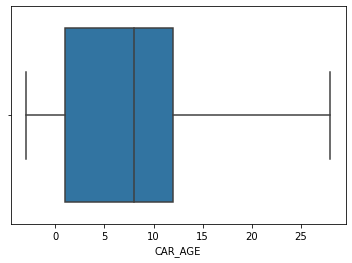

In [75]:
sns.boxplot(df['CAR_AGE'])

In [76]:
df['URBANICITY'].value_counts()

Highly Urban/ Urban      8230
z_Highly Rural/ Rural    2072
Name: URBANICITY, dtype: int64

C:\Users\user\Downloads\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URBANICITY', ylabel='count'>

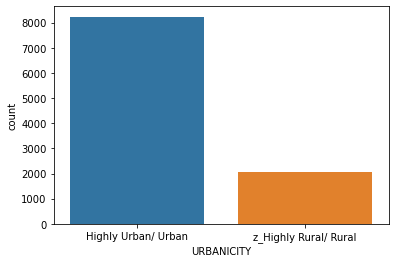

In [77]:
sns.countplot(df['URBANICITY'])

In [78]:
# Converting the columns of object type to float

In [79]:
df[['INCOME' , 'HOME_VAL' , 'BLUEBOOK' , 'OLDCLAIM', 'CLM_AMT']]=df[['INCOME' , 'HOME_VAL' , 'BLUEBOOK' , 'OLDCLAIM', 'CLM_AMT']].replace('[\$,]', '', regex=True).astype(float)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   float64
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   float64
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  float64
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [81]:
df.drop('BIRTH',axis=1,inplace=True)
# Dropping birth , since we have age

In [82]:
# CONVERTING CATEGORICAL COLUMNS TO NUMERICAL 

In [83]:
df1=pd.get_dummies(df,columns=['PARENT1','MSTATUS','GENDER','RED_CAR','REVOKED','URBANICITY','CAR_USE'],drop_first=True)

In [84]:
df1.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,OCCUPATION,TRAVTIME,...,CLM_AMT,CAR_AGE,CLAIM_FLAG,PARENT1_Yes,MSTATUS_z_No,GENDER_z_F,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural,CAR_USE_Private
0,63581743,0,60.0,0,11.0,67349.0,0.0,PhD,Professional,14,...,0.0,18.0,0,0,1,0,1,0,0,1
1,132761049,0,43.0,0,11.0,91449.0,257252.0,z_High School,z_Blue Collar,22,...,0.0,1.0,0,0,1,0,1,0,0,0
2,921317019,0,48.0,0,11.0,52881.0,0.0,Bachelors,Manager,26,...,0.0,10.0,0,0,1,0,1,0,0,1
3,727598473,0,35.0,1,10.0,16039.0,124191.0,z_High School,Clerical,5,...,0.0,10.0,0,0,0,1,0,0,0,1
4,450221861,0,51.0,0,14.0,NaN,306251.0,<High School,z_Blue Collar,32,...,0.0,6.0,0,0,0,0,1,0,0,1


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10302 non-null  int64  
 1   KIDSDRIV                          10302 non-null  int64  
 2   AGE                               10295 non-null  float64
 3   HOMEKIDS                          10302 non-null  int64  
 4   YOJ                               9754 non-null   float64
 5   INCOME                            9732 non-null   float64
 6   HOME_VAL                          9727 non-null   float64
 7   EDUCATION                         10302 non-null  object 
 8   OCCUPATION                        9637 non-null   object 
 9   TRAVTIME                          10302 non-null  int64  
 10  BLUEBOOK                          10302 non-null  float64
 11  TIF                               10302 non-null  int64  
 12  CAR_

In [86]:
# Converting education column to int 

In [87]:
df1['EDUCATION'].value_counts()

z_High School    2952
Bachelors        2823
Masters          2078
<High School     1515
PhD               934
Name: EDUCATION, dtype: int64

In [88]:
education_dict={'<High School':1,'z_High School':2,'Bachelors':3,'Masters':4,'PhD':5}

In [89]:
df1['EDUCATION']=df1['EDUCATION'].map(education_dict)

In [90]:
df1['EDUCATION']

0        5
1        2
2        3
3        2
4        1
        ..
10297    5
10298    4
10299    1
10300    3
10301    2
Name: EDUCATION, Length: 10302, dtype: int64

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10302 non-null  int64  
 1   KIDSDRIV                          10302 non-null  int64  
 2   AGE                               10295 non-null  float64
 3   HOMEKIDS                          10302 non-null  int64  
 4   YOJ                               9754 non-null   float64
 5   INCOME                            9732 non-null   float64
 6   HOME_VAL                          9727 non-null   float64
 7   EDUCATION                         10302 non-null  int64  
 8   OCCUPATION                        9637 non-null   object 
 9   TRAVTIME                          10302 non-null  int64  
 10  BLUEBOOK                          10302 non-null  float64
 11  TIF                               10302 non-null  int64  
 12  CAR_

In [92]:
df['CAR_TYPE'].value_counts()

z_SUV          2883
Minivan        2694
Pickup         1772
Sports Car     1179
Van             921
Panel Truck     853
Name: CAR_TYPE, dtype: int64

In [93]:
df['OCCUPATION'].value_counts()

z_Blue Collar    2288
Clerical         1590
Professional     1408
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: OCCUPATION, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
le=LabelEncoder()

In [101]:
df1['OCCUPATION']=le.fit_transform(df1['OCCUPATION'])

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10302 non-null  int64  
 1   KIDSDRIV                          10302 non-null  int64  
 2   AGE                               10295 non-null  float64
 3   HOMEKIDS                          10302 non-null  int64  
 4   YOJ                               9754 non-null   float64
 5   INCOME                            9732 non-null   float64
 6   HOME_VAL                          9727 non-null   float64
 7   EDUCATION                         10302 non-null  int64  
 8   OCCUPATION                        10302 non-null  int64  
 9   TRAVTIME                          10302 non-null  int64  
 10  BLUEBOOK                          10302 non-null  float64
 11  TIF                               10302 non-null  int64  
 12  CAR_

In [103]:
df1['CAR_TYPE']=le.fit_transform(df['CAR_TYPE'])

In [106]:
df1['OCCUPATION'].head()

0    5
1    7
2    4
3    0
4    7
Name: OCCUPATION, dtype: int64

In [107]:
df1['CAR_TYPE'].head()

0    0
1    0
2    4
3    5
4    0
Name: CAR_TYPE, dtype: int32

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                10302 non-null  int64  
 1   KIDSDRIV                          10302 non-null  int64  
 2   AGE                               10295 non-null  float64
 3   HOMEKIDS                          10302 non-null  int64  
 4   YOJ                               9754 non-null   float64
 5   INCOME                            9732 non-null   float64
 6   HOME_VAL                          9727 non-null   float64
 7   EDUCATION                         10302 non-null  int64  
 8   OCCUPATION                        10302 non-null  int64  
 9   TRAVTIME                          10302 non-null  int64  
 10  BLUEBOOK                          10302 non-null  float64
 11  TIF                               10302 non-null  int64  
 12  CAR_

In [109]:
df1.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,OCCUPATION,TRAVTIME,...,CLM_AMT,CAR_AGE,CLAIM_FLAG,PARENT1_Yes,MSTATUS_z_No,GENDER_z_F,RED_CAR_yes,REVOKED_Yes,URBANICITY_z_Highly Rural/ Rural,CAR_USE_Private
0,63581743,0,60.0,0,11.0,67349.0,0.0,5,5,14,...,0.0,18.0,0,0,1,0,1,0,0,1
1,132761049,0,43.0,0,11.0,91449.0,257252.0,2,7,22,...,0.0,1.0,0,0,1,0,1,0,0,0
2,921317019,0,48.0,0,11.0,52881.0,0.0,3,4,26,...,0.0,10.0,0,0,1,0,1,0,0,1
3,727598473,0,35.0,1,10.0,16039.0,124191.0,2,0,5,...,0.0,10.0,0,0,0,1,0,0,0,1
4,450221861,0,51.0,0,14.0,NaN,306251.0,1,7,32,...,0.0,6.0,0,0,0,0,1,0,0,1


In [110]:
df1.shape

(10302, 26)